In [3]:
# 1) loading libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# define column names
#names =['mel_122', 'mfccs_36', 'chroma_10', 'mfccs_7', 'chroma_0', 'mel_7', 'chroma_11', 'contrast_5', 'mfccs_0', 'mel_123', 'contrast_1', 'contrast_2', 'mel_1', 'mel_0', 'bpm','genre']  
names = ['mel_124', 'mel_119', 'mfccs_3', 'mel_90', 'contrast_5', 'mel_7', 'mel_122', 'contrast_1', 'mel_2', 'mfccs_8', 'mel_1', 'mel_85', 'contrast_2', 'mel_0', 'bpm','genre']

# loading training data
df = pd.read_csv('classifier_features.csv',names = names,header=0)


# making our predictions 
predictions = []

# create design matrix X and target vector y
X = np.array(df.iloc[ :, 0:15])     # end index is exclusive (175,37,51,8,41,60,52,186,1,176,182,183,54,53,0)
y = np.array(df['genre'])   # another way of indexing a pandas df
print X.shape

# split into train and test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print X
print y


(664L, 15L)
[[  4.53447330e-02   2.97452400e-03   1.91842362e+01 ...,  -1.68682210e-02
    7.06298300e-03  -1.40954200e-03]
 [  8.60219460e-02   8.24353900e-03   1.94447660e+01 ...,  -5.68344790e-02
   -2.70440350e-02  -7.43000000e-05]
 [  8.03539430e-02   6.38749100e-03   1.99815055e+01 ...,   1.95021980e-02
    5.52044700e-03   1.46945730e-02]
 ..., 
 [  4.42162330e-02   2.79762100e-03   1.96139108e+01 ...,   4.84245980e-02
   -2.02142710e-02   1.52774600e-03]
 [  7.54258650e-02   6.39473900e-03   1.93730366e+01 ...,   3.41597730e-02
   -4.02243000e-03  -2.98000000e-05]
 [  8.91149210e-02   8.47189000e-03   1.95669052e+01 ...,  -1.75634090e-02
    4.42817600e-03   5.98923000e-03]]
['electronica' 'drum-and-bass' 'breaks' 'dubstep' 'electronica'
 'hard-dance' 'drum-and-bass' 'dubstep' 'hardcore-hard-techno' 'hard-dance'
 'trance' 'deep-house' 'trance' 'drum-and-bass' 'drum-and-bass' 'trance'
 'trance' 'drum-and-bass' 'drum-and-bass' 'drum-and-bass' 'dj-tools'
 'progressive-house' 'dubs


--------------------------------------------

k-Nearnest Neighbors(K-NN) Algorithm
--------------------------------------------

##############################################################################################################

###############
 For Fold 1
###############

The optimal K is : 21.000000
The best accuracy with optimal K is :17.293233
##############################################################################################################

###############
 For Fold 2
###############

The optimal K is : 45.000000
The best accuracy with optimal K is :26.315789
##############################################################################################################

###############
 For Fold 3
###############

The optimal K is : 25.000000
The best accuracy with optimal K is :18.045113
##############################################################################################################

###############
 For Fold 4
###############

The optimal K 

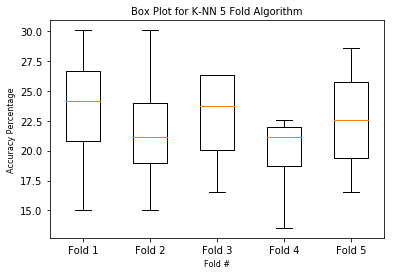

In [4]:
###################
#     KNN         #
###################
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, datasets
import operator
from prettytable import PrettyTable
import random
from tabulate import tabulate
from sklearn.metrics import precision_score,f1_score,recall_score

print "\n--------------------------------------------"
print "\nk-Nearnest Neighbors(K-NN) Algorithm"
print "--------------------------------------------\n"

X_Original = X
Y_Original = y
kfold = KFold(n_splits=5)
accuracy = []
model = []

best_accuracy_outer = []
model_outer = []

all_folds_accuracy = [[]]
i=1
for train_index_out, test_index_out in kfold.split(X_Original):
    
    print "##############################################################################################################"
    print "\n###############"
    print " For Fold %d" % i
    print "###############\n"
    i=i+1
    x_train_out, y_train_out = X_Original[train_index_out], Y_Original[train_index_out]
    x_test_out, y_test_out = X_Original[test_index_out], Y_Original[test_index_out]
    #print x_train_out
    
    kfold = KFold(n_splits=4)
    accuracy_inner = []
    model_inner = []
    
    accuracy_best_k = dict()
    confusion_matrix_inner = dict()
    accuracy_at_each_k = []
    for parameters in (3,5,7,9,11,13,17,19,21,25,31,37,41,45,49):
        accuracy_inner_k = []
        cm_inner = []
        for train_index, val_index in kfold.split(x_train_out):
            
            x_train, y_train= x_train_out[train_index], y_train_out[train_index]
            x_val, y_val = x_train_out[val_index], y_train_out[val_index]
            
            X_train = x_train
            X_test = x_val
            y_train = y_train
            y_test = y_val

            knn_classifier = KNeighborsClassifier(n_neighbors=parameters)
            knn_classifier.fit(X_train,y_train)
            preds = knn_classifier.predict(X_test[:,:])
            temp_accuracy = accuracy_score(y_test,preds)*100
            
            #df_confusion = pd.crosstab(y_val,preds, rownames=['actual'], colnames=['preds'])
            cm_k = confusion_matrix(y_val, preds)
            cm_inner.append(cm_k)
            #print df_confusion
            
            #print ('The accuracy for KNN is %d%%' % temp_accuracy)
            accuracy_inner_k.append(temp_accuracy)
    
            #print('\n\n')
        confusion_matrix_inner[parameters] = cm_inner
        accuracy_best_k[parameters]=np.mean(accuracy_inner_k)
        accuracy_at_each_k.append(accuracy_best_k[parameters])
        
    
    #print accuracy_best_k
    Best_k= max(accuracy_best_k.iteritems(), key=operator.itemgetter(1))[0]
    #print accuracy_at_each_k
    #print all_folds_accuracy
    all_folds_accuracy.append(accuracy_inner_k)
    
    
    
    knn_classifier = KNeighborsClassifier(n_neighbors=Best_k)
    knn_classifier.fit(x_train_out,y_train_out)
    preds = knn_classifier.predict(x_test_out[:,:])
    temp_accuracy = accuracy_score(y_test_out,preds)*100
    print "The optimal K is : %f" %Best_k
    print 'The best accuracy with optimal K is :%f' % temp_accuracy
    
    best_accuracy_outer.append(temp_accuracy)
    
    
    #cm = pd.crosstab(y_test_out,preds, rownames=['actual'], colnames=['preds'])
    cm = confusion_matrix(y_test_out, preds)
    
print "\nAccuracy of all folds for train data\n"    
x = PrettyTable()

x.add_column("Fold 1", all_folds_accuracy[1])
x.add_column("Fold 2", all_folds_accuracy[2])
x.add_column("Fold 3", all_folds_accuracy[3])
x.add_column("Fold 4", all_folds_accuracy[4])
x.add_column("Fold 5", all_folds_accuracy[5])
print(x)

#box plot
fig, axes = plt.subplots(nrows=1, ncols=1, sharey=True)
axes.set_xlabel('Fold #', fontsize=8)
axes.set_ylabel('Accuracy Percentage', fontsize=8)
axes.boxplot(all_folds_accuracy[1:], whis='range',labels=["Fold 1","Fold 2","Fold 3","Fold 4","Fold 5"])
axes.set_title('Box Plot for K-NN 5 Fold Algorithm', fontsize=10)
plt.show()

#all_algorithms_accuracies.append(best_accuracy_outer)
#print all_folds_accuracy


del accuracy_inner_k
del cm_inner
del accuracy_inner
del model_inner
accuracy_best_k.clear()
confusion_matrix_inner.clear()